In [1]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
#use 1 train data
train_data = pd.read_csv("./data/data-1.txt", sep=";").to_numpy()
train_data = train_data[:, 1:]  # remove the first column (index)
train_data

array([[ 0.016098, -0.715149, -0.683319],
       [-0.005112, -0.715485, -0.73024 ],
       [ 0.001266, -0.721649, -0.699524],
       ...,
       [ 0.008545, -0.461151, -0.815018],
       [ 0.103119, -0.490143, -0.861023],
       [ 0.062332, -0.532181, -0.802933]], shape=(736, 3))

In [3]:
# Load all the data
data_path = "./data/"
data_files = glob.glob(data_path + "*.txt")
print("Data files found:", data_files)
data = []
for file in data_files:
    df = pd.read_csv(file, sep=";").to_numpy()
    data.append(df[:, 1:])  # remove the first column (index)
data = np.concatenate(data, axis=0)  # concatenate all data
# Split the data into training and testing sets
train_data = data

Data files found: ['./data/data-9.txt', './data/data-8.txt', './data/data-3.txt', './data/data-2.txt', './data/data-1.txt', './data/data-5.txt', './data/data-4.txt', './data/data-10.txt', './data/data-6.txt', './data/data-7.txt']


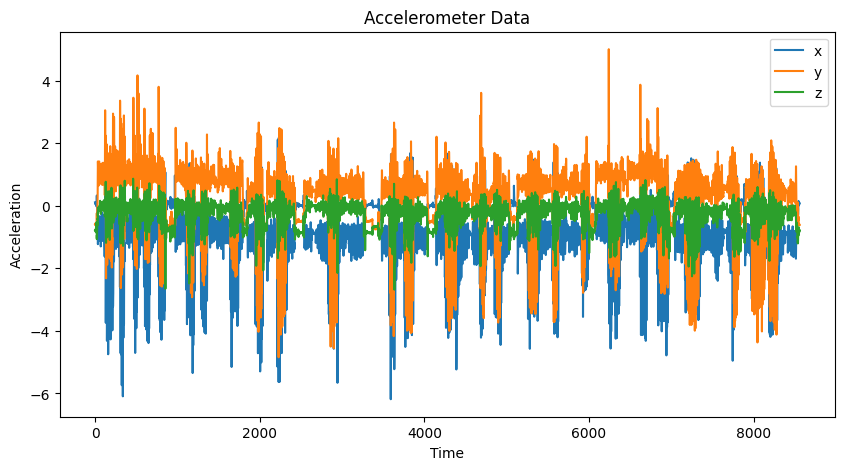

In [4]:
plt.figure(figsize=(10, 5))
x = train_data[:, 0]
y = train_data[:, 1]
z = train_data[:, 2]
time = np.arange(len(x))
plt.plot(time, x, label="x")
plt.plot(time, y, label="y")
plt.plot(time, z, label="z")
plt.title("Accelerometer Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.show()

# Use sample data for initialization

In [5]:
stand_sample = pd.read_csv("./sample/Standing-1.txt",sep=";").to_numpy()
stand_sample= stand_sample[:, 1:]
mean1 = np.mean(stand_sample, axis=0)
cov1 = np.cov(stand_sample.T)
print("mean: ", mean1)
print("cov: ", cov1)

mean:  [-0.14627557 -0.06211391 -0.73044946]
cov:  [[3.16804697e-01 2.10281989e-04 3.96314050e-02]
 [2.10281989e-04 7.44663298e-02 4.02394825e-02]
 [3.96314050e-02 4.02394825e-02 5.60014791e-02]]


In [6]:
walk_sample = pd.read_csv('./sample/Walking-1.txt',sep=";").to_numpy()
walk_sample = walk_sample[:,1:] # remove the first column
mean2 = np.mean(walk_sample, axis=0)
cov2 = np.cov(walk_sample.T)
print("mean: ", mean2)
print("cov: ", cov2)

mean:  [-1.14212688  0.41708957 -0.13096312]
cov:  [[0.08571349 0.00231596 0.00391231]
 [0.00231596 0.04870314 0.01270709]
 [0.00391231 0.01270709 0.01728954]]


In [7]:
run_sample = pd.read_csv("./sample/Running-1.txt",sep=";")
run_sample = run_sample.to_numpy()
run_sample = run_sample[:,1:]
mean3 = np.mean(run_sample, axis=0)
cov3 = np.cov(run_sample.T)
print("Mean: ", mean3)
print("Covariance: ", cov3)

Mean:  [-0.99005461 -0.90711392 -0.34751523]
Covariance:  [[2.26046368 1.0152967  0.09799658]
 [1.0152967  2.3002177  0.33439753]
 [0.09799658 0.33439753 0.17334667]]


In [8]:
# Initial state probabilities
initia_state = np.array([1, 0, 0])  
# Transition probabilities
transition_matrix = np.array([[0.8, 0.1, 0.1], 
                              [0.1, 0.8, 0.1], 
                              [0.1, 0.1, 0.8]])
mc = MarkovChain(initia_state, transition_matrix)

g1 = GaussD(means=mean1, cov=cov1)
g2 = GaussD(means=mean2, cov=cov2)
g3 = GaussD(means=mean3, cov=cov3)

h = HMM(mc, [g1, g2, g3])

In [9]:
h.train(train_data,debug=False)

log-likelihood: -20267.602318159745
log-likelihood: -12382.04959138046
log-likelihood: -10657.32621018504
log-likelihood: -10332.861563156413
log-likelihood: -10231.916059771422
log-likelihood: -10187.831164055606
log-likelihood: -10175.932196631777
log-likelihood: -10173.410412148221
log-likelihood: -10172.841940626695
log-likelihood: -10172.719820188024


In [10]:
viterbi_path = h.viterbi(train_data)
print("Viterbi path: ", viterbi_path)

Viterbi path:  [0 0 0 ... 0 0 0]


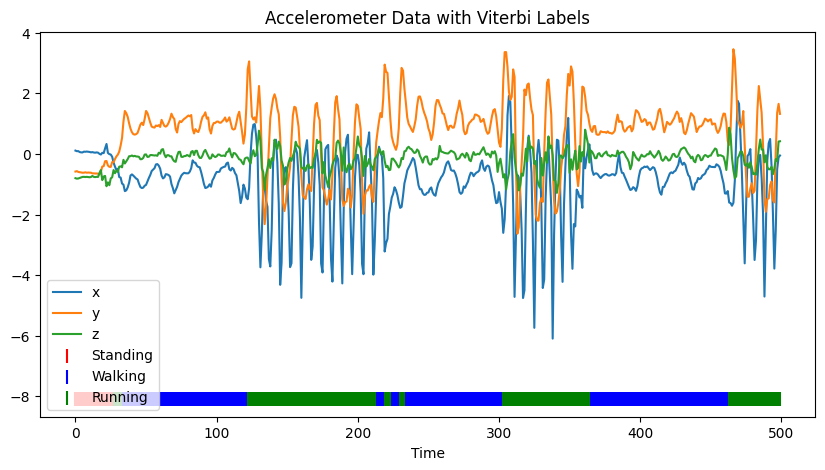

In [14]:
top_n = 500
pred_label = viterbi_path[:top_n]
time = np.arange(top_n)
x = train_data[:top_n, 0]
y = train_data[:top_n, 1]
z = train_data[:top_n, 2]
# Plot the first 500 data points
plt.figure(figsize=(10, 5))
plt.plot(time, x, label="x")
plt.plot(time, y, label="y")
plt.plot(time, z, label="z")
# pred_labelごとに色分けして描画
colors = {0: 'red', 1: 'blue', 2: 'green'}
labels = {0: "Standing", 1: "Walking", 2: "Running"}
for label, color in colors.items():
    idx = np.where(pred_label == label)[0]
    plt.scatter(time[idx], [min(x)-2]*len(idx), color=color, label=labels[label], marker='|', s=100)
plt.title("Accelerometer Data with Viterbi Labels")
plt.xlabel("Time")
plt.legend()
plt.show()

# Use random initialization

In [15]:
# Initial state probabilities
initia_state = np.array([1, 0, 0])  
# Transition probabilities
transition_matrix = np.array([[0.8, 0.1, 0.1], 
                              [0.1, 0.8, 0.1], 
                              [0.1, 0.1, 0.8]])
mc = MarkovChain(initia_state, transition_matrix)

# Emission probabilities
mean1 = np.array([0, 0, 0])
cov1 = np.array([[1, 0, 0], 
                  [0, 1, 0], 
                  [0, 0, 1]])
mean2 = np.array([1, 1, 1])
cov2 = np.array([[1, 0, 0], 
                  [0, 1, 0], 
                  [0, 0, 1]])
mean3 = np.array([2, 2, 2])
cov3 = np.array([[1, 0, 0], 
                  [0, 1, 0], 
                  [0, 0, 1]])
# Create Gaussian distributions
g1 = GaussD(means=mean1, cov=cov1)
g2 = GaussD(means=mean2, cov=cov2)
g3 = GaussD(means=mean3, cov=cov3)

h = HMM(mc, [g1, g2, g3])

In [ ]:
h.train(train_data,nIter=100,debug=False)

log-likelihood: -38683.41477324647
log-likelihood: -26111.223829321003
log-likelihood: -25634.69708609353
log-likelihood: -22793.098672376862
log-likelihood: -17081.38650350673
log-likelihood: -15178.981988213312
log-likelihood: -14690.021003790687
log-likelihood: -14410.352708508124
log-likelihood: -14181.352082220472
log-likelihood: -13977.582873386165
log-likelihood: -13846.276967622109
log-likelihood: -13754.243758960749
log-likelihood: -13680.205082748109
log-likelihood: -13618.362707803797
log-likelihood: -13570.67633788559
log-likelihood: -13539.5415904904
log-likelihood: -13518.289645104001
log-likelihood: -13501.474479880968
log-likelihood: -13486.966102085595
log-likelihood: -13473.799451621506
log-likelihood: -13461.611620906457
log-likelihood: -13450.395751068647
log-likelihood: -13440.217638638624
log-likelihood: -13430.804980863972
log-likelihood: -13421.137848086282
log-likelihood: -13408.838570297314
log-likelihood: -13392.239301850464
log-likelihood: -13371.87365606825

In [ ]:
viterbi_path = h.viterbi(train_data)
print("Viterbi path: ", viterbi_path)

In [ ]:
top_n = 500
pred_label = viterbi_path[:top_n]
time = np.arange(top_n)
x = train_data[:top_n, 0]
y = train_data[:top_n, 1]
z = train_data[:top_n, 2]
# Plot the first 500 data points
plt.figure(figsize=(10, 5))
plt.plot(time, x, label="x")
plt.plot(time, y, label="y")
plt.plot(time, z, label="z")
# pred_labelごとに色分けして描画
colors = {0: 'red', 1: 'blue', 2: 'green'}
labels = {0: "Standing", 1: "Walking", 2: "Running"}
for label, color in colors.items():
    idx = np.where(pred_label == label)[0]
    plt.scatter(time[idx], [min(x)-2]*len(idx), color=color, label=labels[label], marker='|', s=100)
plt.title("Accelerometer Data with Viterbi Labels")
plt.xlabel("Time")
plt.legend()
plt.show()